## Consigne

Le travail attendu pour ces 3 semaines est à faire dans les fichiers `session1.py`, `session2.py`, `session3.py`. 

Les fichiers `session{1|2|3}.py` commenceront par un commentaire avec les noms de leur auteur :

```python
# prenom1 nom1
# prenom2 nom2
```

Une attention particulière sera portée à la qualité de la documentation de votre code.

Cette semaine, il s'agit de travaillr dans session3.py

# Session 3 -Modélisation spatialisé de cultures diversifiées

In [1]:
import matplotlib.pyplot as plt
import session3 as project
%matplotlib inline

On suppose maintenant qu'on cherche à planter des plantes aléatoirement dans un champ. 

# 1 Modélisation statique

Dans un premier temps, on modélise des plantes d'espèces différentes comme des des disques ayant des rayons différents. On place ces disques aléatoirement avec une loi uniforme sur la position de sorte qu'elles ne s'intersectent pas.

#### 1.1 Implémenter une fonction qui renvoie une liste de N plantes plantées aléatoirement avec une loi uniforme sur un carré de longueur L. Les plantes sont représentées par des disques de rayons aléatoire entre $r_{min}$ et $r_{max}$.

In [2]:
N = 150
L = 10
rmin = .05
rmax = .8
plants = project.multi_intercrop(N, L, rmin, rmax)
print(plants[0])

{'pos': [2.7583430426283844, 6.402924506174025], 'r': 0.5494378953583844}


#### 1.2 Implémenter une fonction qui produit une représentation graphique du champs.

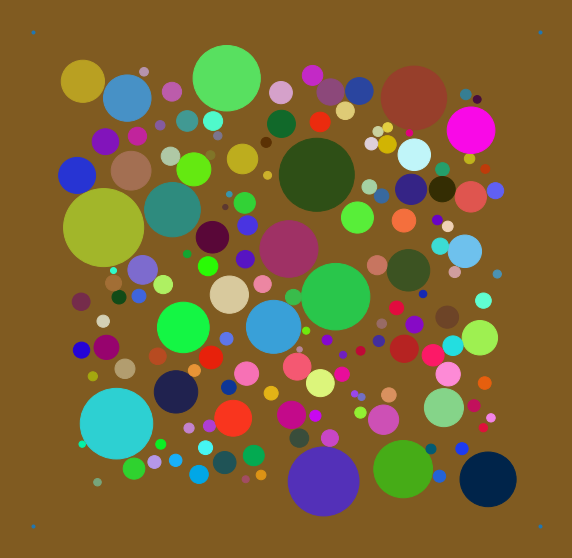

In [3]:
project.fig_field(plants,L)

#### 1.3 Imaginer un algorithme plus rapide que l'algorithme naïf dans le cas ou on a un seul rayon(On pourra utiliser un KD tree pour chercher les Ns plus proches voisins). Comparer les vitesses d'execution des deux fonctions.

1 0
2 1
3 1
4 1
5 1
6 1
7 1
8 1
9 1
10 1
11 1
12 1
13 1
14 1
15 1
16 1
17 1
18 1
19 1
20 1
21 1
22 1
23 1
24 1
25 1
26 1
27 1
28 1
29 1
30 1
31 1
32 1
33 1
34 1
35 1
36 1
37 1
38 1
39 1
40 1
41 1
42 1
43 1
44 1
45 1
46 1
47 1
48 1
49 1
50 1
51 1
52 1
53 1
54 1
55 1
56 1
57 1
58 1
59 1
60 1
61 1
62 1
63 1
64 1
65 1
66 1
67 1
68 1
69 1
70 1
71 1
72 1
73 1
74 1
75 1
76 1
77 1
78 1
79 1
80 1
81 1
82 1
83 1
84 1
85 1
86 1
87 1
88 1
89 1
90 1
91 1
92 1
93 1
94 1
95 1
96 1
97 1
98 1
99 1
100 1
101 1
102 1
103 1
104 1
105 1
106 1
107 1
108 1
109 1
110 1
111 1
112 1
113 1
114 1
115 1
116 1
117 1
118 1
119 1
120 1
121 1
122 2
123 1
124 1
125 1
126 1
127 1
128 1
129 1
130 1
131 1
132 1
133 1
134 1
135 1
136 1
137 1
138 1
139 1
140 1
141 1
142 1
143 1
144 1
145 1
146 1
147 1
148 1
149 1
150 1
151 1
152 1
153 1
154 1
155 1
156 1
157 1
158 1
159 1
160 1
161 1
162 1
163 1
164 1
165 1
166 1
167 1
168 2
169 1
170 1
171 1
172 1
173 1
174 1
175 1
176 1
177 1
178 1
179 1
180 1
181 1
182 1
183 1
184 1
185 

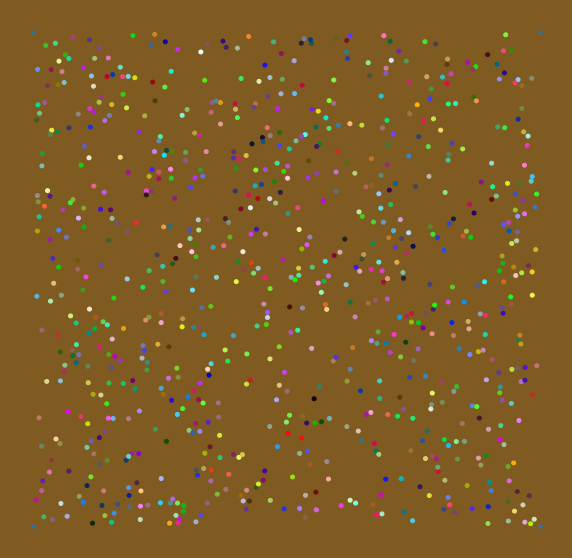

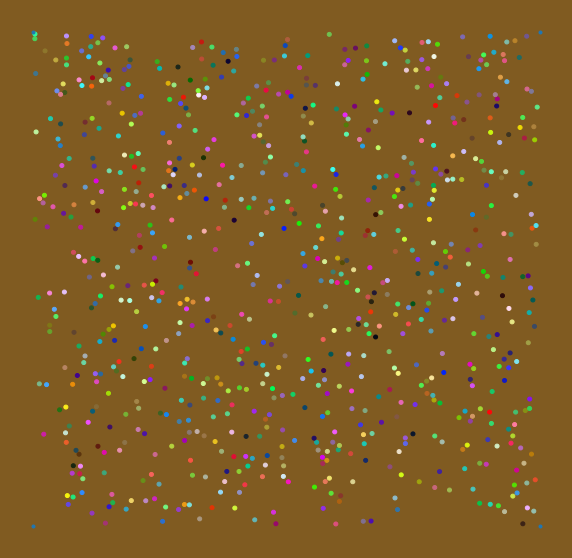

In [4]:
L=100
N=800
r=.4

t, plants = project.monocrop(N,L,r)
t_KD, plants_KD = project.monocrop_KD(N,L,r)
print("Algo naïf: %s, Algo KD tree: %s"%(t,t_KD))

project.fig_field(plants,L)
project.fig_field(plants_KD, L)

#### 1.4 Quand on considère une espèce unique (toutes les plantes ont le même rayon), quelle est la densité maximale possible de plantes en considérant une seule espèce sur un réseau triangulaire

#### 1.5 Estimer la densité moyenne maximale qu'on peut atteindre avec un plantation aléatoire et comparer la à la densité maximale (avec une espèce)

# 2 Modélisation dynamique

On considère maintenant la dynamique de croissance des plantes, on suppose que les plantes sont plantées à des temps aléatoires suivant une loi de Poisson. Le rayon de la plante croit suivant $r(t)  = \alpha t$ jusqu'à ce que les plantes soient enlevées du champs après un temps $t_h$. On vérifiera avant de planter chaque plante que celle-ci n'entrera pas en collision avec ses voisines au cours de leur croissance.

#### 2.1 Simuler la dynamique du champs. La fonction renverra une liste de dictionnaires (un par plante) contenant la position et le temps de plantation de celle-ci. Implémenter un fonction qui permet de visualiser l'état du champs au temps t (un snapshot et une animation).

In [5]:
planting_rate=1
Rmax=.4
th=30
plants, ps = project.dynamic_random_planting(planting_rate, Rmax, th)
project.fig_dynamic(plants, "random_planting.png", "random_planting.mp4")
print(ps)

/home/kodda/Dropbox/p2pflab/kaku/L3INFO/TME_agri/all_sessions/session3.py:103: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig=pl.figure(figsize=(10,4))
IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (572, 231) to (576, 240) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


[{'pos': [4.668048842289379, 1.014139719211888], 't': 65}, {'pos': [2.1664818975608275, 1.5917205716611718], 't': 69}, {'pos': [5.908851342793739, -0.26851403690643005], 't': 69}, {'pos': [3.3409368812902107, 0.5624180750079493], 't': 69}, {'pos': [2.7744207036029223, 1.117325175956231], 't': 70}, {'pos': [3.5261671365763285, 0.1519857571392902], 't': 72}, {'pos': [8.779162420568102, 0.7319397795242479], 't': 72}, {'pos': [2.4914027264544703, -1.3268745111409428], 't': 74}, {'pos': [7.386074777821885, 1.5723004133950549], 't': 74}, {'pos': [1.1151562383304183, 1.196253128693074], 't': 75}, {'pos': [4.338517512739314, 1.4247063863938485], 't': 75}, {'pos': [7.733674833854234, -1.5094280181321844], 't': 75}, {'pos': [1.6772722172993255, 0.7784589752882152], 't': 76}, {'pos': [5.169151083438382, 0.4476232564203322], 't': 77}, {'pos': [9.329932414175262, -1.277682208486419], 't': 77}, {'pos': [0.49978271247025197, -1.09338354019558], 't': 77}, {'pos': [4.971401166784223, -0.477565429736931

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

In [6]:
from IPython.display import Video

Video("random_planting.mp4")

#### 2.2 Trouver une façon plus rapide de faire les simulations (Bonus)